In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation

In [2]:
df = pd.read_csv('../data/comple_pre.csv')

In [3]:
train_ds = df.iloc[:55623,:]

In [4]:
y_train_ds = train_ds.iloc[:,1]
x_train_ds = train_ds.iloc[:,2:]

In [5]:
test_ds = df.iloc[55623:,:]

In [6]:
y_test_ds = test_ds.iloc[:,1]
x_test_ds = test_ds.iloc[:,2:]

In [7]:
test_ds

,Date,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION,ta,hm
55623,2022-03-06 00:00:00,-0.517085,1.221997,-0.386261,1.017957,0.869240,-0.131775,1.501838,0.323007,0.006577,...,0.925181,0.016546,-1.396217,-1.326044,-1.250679,-1.308990,-1.393101,-1.320388,-0.1,49.5
55624,2022-03-06 00:01:00,-0.692750,1.543256,-0.063290,1.769483,1.806310,-0.100215,1.659636,-0.138140,0.006577,...,0.928896,-0.168277,-1.396169,-1.370461,-1.277948,-1.374831,-1.418298,-1.372733,-0.1,49.2
55625,2022-03-06 00:02:00,-0.612177,1.352766,-0.557039,1.199359,0.430050,0.012661,1.582228,-0.436538,0.006577,...,0.918204,0.066697,-1.385884,-1.350844,-1.270821,-1.351290,-1.498489,-1.353415,0.0,48.9
55626,2022-03-06 00:03:00,-0.679451,1.165709,-0.312363,0.841270,1.672645,-0.465508,1.371519,-0.301015,0.006577,...,0.915582,0.130203,-1.369585,-1.407748,-1.257832,-1.398213,-1.563693,-1.396654,0.1,48.7
55627,2022-03-06 00:04:00,-0.713291,1.262551,-0.060732,0.965622,1.522774,-0.434533,1.579239,0.010718,0.006577,...,0.896404,0.106281,-1.374538,-1.372035,-1.306223,-1.332272,-1.397868,-1.331622,0.1,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62775,2022-03-16 11:41:00,0.265857,0.000963,-0.178544,2.395042,-1.810446,0.420922,-1.151115,-1.762902,0.006577,...,0.204051,0.327606,1.876406,1.118065,1.125768,1.146253,0.446107,1.134180,12.6,44.1
62776,2022-03-16 11:42:00,0.161821,-0.907756,-0.520904,1.760988,-0.913002,1.519289,-1.338824,-0.996386,0.006577,...,0.163715,0.638279,2.061500,1.111407,1.109180,1.168355,0.571459,1.168223,12.7,42.6
62777,2022-03-16 11:43:00,0.237987,-0.725154,-0.598766,0.966108,-1.782670,1.250577,-1.370039,0.475098,0.006577,...,0.149471,0.913418,2.345914,1.210235,1.155295,1.304677,0.710798,1.309256,12.8,38.6
62778,2022-03-16 11:44:00,0.395763,-1.366680,-0.785705,0.135387,-1.641799,2.296248,-1.620015,1.654851,0.006577,...,0.152344,1.078345,2.513985,1.422461,1.216345,1.519712,0.757007,1.517956,12.8,35.3


In [8]:
train_ds

,Date,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION,ta,hm
0,2022-01-02 18:23:00,-0.696720,1.780565,2.991449,2.256335,1.092835,0.794482,1.119847,-0.239467,-2.623049,...,-0.803235,-1.951646,-1.054610,-2.245224,-2.225343,-2.028138,1.154996,-2.026161,-1.5,68.7
1,2022-01-02 18:26:00,-1.136638,2.060365,2.844743,2.193955,1.241182,0.187569,0.825091,-0.573274,-2.934943,...,-0.732489,-1.983516,-1.094731,-2.148095,-2.214059,-1.994608,1.173750,-1.994063,-1.5,69.4
2,2022-01-02 18:28:00,-1.072279,2.094039,2.970381,1.718137,1.800609,0.376263,1.109972,-0.748070,-2.978062,...,-0.705726,-1.963824,-1.076626,-2.192102,-2.247237,-2.047210,1.242733,-2.044568,-1.5,71.3
3,2022-01-02 18:29:00,-0.964906,1.876524,2.476940,1.246795,0.571312,0.333397,0.804488,-0.280129,-2.135760,...,-0.671157,-1.991270,-1.069302,-2.206725,-2.251125,-2.059985,1.402284,-2.055574,-1.5,71.0
4,2022-01-02 18:30:00,-1.090287,1.899278,2.646269,1.435392,0.505971,-0.433901,0.597248,0.537152,-1.585906,...,-0.655258,-1.883006,-1.073603,-2.220357,-2.234001,-2.057402,1.130145,-2.053294,-1.5,70.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55618,2022-02-28 23:55:00,-0.626766,0.721320,-0.251204,0.451665,0.282264,-0.012586,1.164966,0.177458,1.285700,...,1.660671,-1.857239,-1.200023,-1.329704,-1.235075,-1.239841,-1.102761,-1.236639,4.2,60.5
55619,2022-02-28 23:56:00,-0.624782,0.384558,0.066091,0.278023,0.230628,-1.062271,0.967005,0.153338,1.441129,...,1.640306,-1.739612,-1.212508,-1.247943,-1.261580,-1.171404,-1.283667,-1.172560,4.2,60.5
55620,2022-02-28 23:57:00,-0.688591,0.310406,0.067903,0.284631,0.599123,-0.013106,1.267929,0.186019,0.441714,...,1.641068,-1.786830,-1.210105,-1.255836,-1.224608,-1.226425,-1.120697,-1.228087,4.2,60.6
55621,2022-02-28 23:58:00,-0.681827,0.252879,-0.094169,0.403219,0.591982,0.218796,1.199350,0.230192,0.255364,...,1.667294,-1.762208,-1.213724,-1.252129,-1.254283,-1.205651,-1.068400,-1.210669,4.2,60.9


In [9]:
print(x_train_ds.shape)

(55623, 32)


In [10]:
x_train = np.array(x_train_ds)
y_train = np.array(y_train_ds)
x_test = np.array(x_test_ds)
y_test = np.array(y_test_ds)

In [11]:
x_train

array([[ 1.78056498e+00,  2.99144857e+00,  2.25633506e+00, ...,
        -2.02616052e+00, -1.50000000e+00,  6.87000000e+01],
       [ 2.06036537e+00,  2.84474286e+00,  2.19395480e+00, ...,
        -1.99406335e+00, -1.50000000e+00,  6.94000000e+01],
       [ 2.09403925e+00,  2.97038086e+00,  1.71813669e+00, ...,
        -2.04456789e+00, -1.50000000e+00,  7.13000000e+01],
       ...,
       [ 3.10406254e-01,  6.79034784e-02,  2.84631227e-01, ...,
        -1.22808724e+00,  4.20000000e+00,  6.06000000e+01],
       [ 2.52878863e-01, -9.41694245e-02,  4.03219324e-01, ...,
        -1.21066853e+00,  4.20000000e+00,  6.09000000e+01],
       [ 5.63280177e-01, -1.48096497e-01, -5.65853568e-01, ...,
        -1.27916369e+00,  4.20000000e+00,  6.10000000e+01]])

In [12]:
x_test_ds

,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,SRH(Reheater) OUT STM TEMP,Accumulator A Inlet PCV POS,...,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION,ta,hm
55623,1.221997,-0.386261,1.017957,0.869240,-0.131775,1.501838,0.323007,0.006577,0.493053,-1.020861,...,0.925181,0.016546,-1.396217,-1.326044,-1.250679,-1.308990,-1.393101,-1.320388,-0.1,49.5
55624,1.543256,-0.063290,1.769483,1.806310,-0.100215,1.659636,-0.138140,0.006577,0.185594,-1.231064,...,0.928896,-0.168277,-1.396169,-1.370461,-1.277948,-1.374831,-1.418298,-1.372733,-0.1,49.2
55625,1.352766,-0.557039,1.199359,0.430050,0.012661,1.582228,-0.436538,0.006577,0.033736,-1.114460,...,0.918204,0.066697,-1.385884,-1.350844,-1.270821,-1.351290,-1.498489,-1.353415,0.0,48.9
55626,1.165709,-0.312363,0.841270,1.672645,-0.465508,1.371519,-0.301015,0.006577,-0.000105,-1.118633,...,0.915582,0.130203,-1.369585,-1.407748,-1.257832,-1.398213,-1.563693,-1.396654,0.1,48.7
55627,1.262551,-0.060732,0.965622,1.522774,-0.434533,1.579239,0.010718,0.006577,0.108648,-1.184903,...,0.896404,0.106281,-1.374538,-1.372035,-1.306223,-1.332272,-1.397868,-1.331622,0.1,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62775,0.000963,-0.178544,2.395042,-1.810446,0.420922,-1.151115,-1.762902,0.006577,-1.621387,0.853583,...,0.204051,0.327606,1.876406,1.118065,1.125768,1.146253,0.446107,1.134180,12.6,44.1
62776,-0.907756,-0.520904,1.760988,-0.913002,1.519289,-1.338824,-0.996386,0.006577,-1.074596,0.924305,...,0.163715,0.638279,2.061500,1.111407,1.109180,1.168355,0.571459,1.168223,12.7,42.6
62777,-0.725154,-0.598766,0.966108,-1.782670,1.250577,-1.370039,0.475098,0.006577,-0.226602,1.207038,...,0.149471,0.913418,2.345914,1.210235,1.155295,1.304677,0.710798,1.309256,12.8,38.6
62778,-1.366680,-0.785705,0.135387,-1.641799,2.296248,-1.620015,1.654851,0.006577,0.800887,1.193899,...,0.152344,1.078345,2.513985,1.422461,1.216345,1.519712,0.757007,1.517956,12.8,35.3


In [13]:
learning_rate = 0.01
training_cnt = 500
batch_size = 100
input_size = 32

In [15]:
model = Sequential()
model.add(Dense(input_size, activation='tanh', input_shape=(x_train.shape[1],)))
model.add(Dense(48, activation='tanh'))
model.add(Dense(96, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='sgd', loss='mae', metrics=['mse', 'mape', 'acc'])
model.summary()

c:\Users\CSK\Documents\coder\NOx-with-TFT\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,481 (40.94 KB)

 Trainable params: 10,481 (40.94 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(x_train, y_train, epochs=training_cnt, batch_size=batch_size, verbose=1)
val_mse, val_mae, val_mape, val_acc = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - acc: 0.0000e+00 - loss: 0.3598 - mape: 275.0949 - mse: 0.2203
Epoch 2/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - acc: 0.0000e+00 - loss: 0.3396 - mape: 232.3544 - mse: 0.2019
Epoch 3/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - acc: 0.0000e+00 - loss: 0.3344 - mape: 261.6007 - mse: 0.1967
Epoch 4/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - acc: 0.0000e+00 - loss: 0.3319 - mape: 428.2802 - mse: 0.1955
Epoch 5/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - acc: 0.0000e+00 - loss: 0.3273 - mape: 247.1503 - mse: 0.1916
Epoch 6/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - acc: 0.0000e+00 - loss: 0.3231 - mape: 242.5701 - mse: 0.1887
Epoch 7/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - acc: 0.0000e+00 - loss: 0.3197 - mape: 220.8599 - mse: 0.1856
Epoch 8/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - acc: 0.0000e+00 - loss: 0.3189 - mape: 260.5905 - mse: 0.1854
Epoch 9/500
557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 448u

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


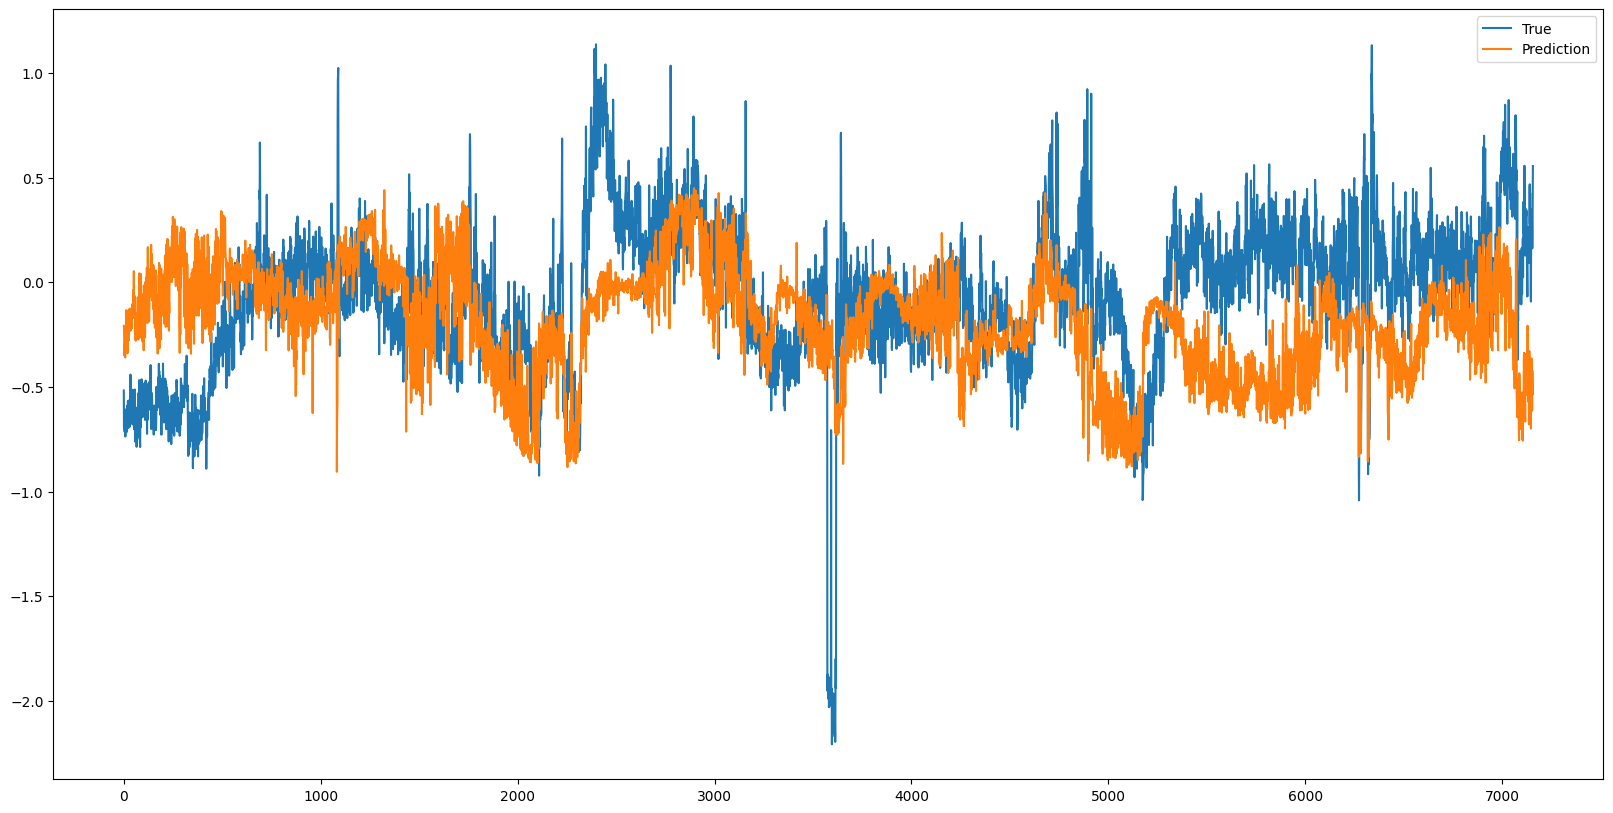

In [18]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()